In [1]:
#https://ieeexplore.ieee.org/document/10549889

In [2]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import keras.models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

2024-08-21 16:20:55.579824: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 16:20:55.579909: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 16:20:55.579934: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 16:20:55.587850: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load datasets
ppg_data_combined = pd.read_excel('combined_dataset.xlsx')

ppg_data_combined['Sex(M/F)'] = ppg_data_combined['Sex(M/F)'].map({'Male': 1, 'Female': 0})

print(ppg_data_combined)

     Num.  subject_ID  Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  \
0       1           2         0         45         152          63   
1       1           2         0         45         152          63   
2       1           2         0         45         152          63   
3       2           3         0         50         157          50   
4       2           3         0         50         157          50   
..    ...         ...       ...        ...         ...         ...   
652   218         418         1         25         173          63   
653   218         418         1         25         173          63   
654   219         419         1         24         175          58   
655   219         419         1         24         175          58   
656   219         419         1         24         175          58   

     Systolic Blood Pressure(mmHg)  Diastolic Blood Pressure(mmHg)  \
0                              161                              89   
1                  

In [5]:
# 참가자의 숫자 확인
print(ppg_data_combined['subject_ID'].nunique())

219


The dataset provided by Liang et al. in their study is a valuable resource for non-invasive CVD detection, encompassing 657 data segments from 219 individuals.

In [6]:
data_systolic = ppg_data_combined["Systolic Blood Pressure(mmHg)"]
data_diastolic = ppg_data_combined["Diastolic Blood Pressure(mmHg)"]
data_sex = ppg_data_combined["Sex(M/F)"]
data_age = ppg_data_combined["Age(year)"]
data_height = ppg_data_combined["Height(cm)"]
data_weight = ppg_data_combined["Weight(kg)"]
data_hr = ppg_data_combined["Heart Rate(b/m)"]
data_bmi = ppg_data_combined["BMI(kg/m^2)"]

ppg_data = ppg_data_combined.iloc[:,14:]

data_personal = pd.concat([data_sex, data_age, data_height, data_weight, data_hr, data_bmi], axis=1)

In [7]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(data_personal)

# Transform the data
normalized_data = scaler.transform(data_personal)

In [8]:
# Convert back to a DataFrame (optional, if you need the result as a DataFrame)
normalized_df = pd.DataFrame(normalized_data, columns=data_personal.columns)

ppg_data = np.array(ppg_data)
data_personal = np.array(normalized_df)
print(ppg_data)
print(data_personal)

[[2438 2438 2438 ... 1827 1754 1754]
 [2201 2201 2171 ... 1997 1997 1997]
 [2019 2014 2014 ... 1924 1929 1929]
 ...
 [3083 3039 3071 ... 2422 2451 2379]
 [2426 2431 2446 ... 3103 3146 3151]
 [2691 2718 2743 ... 2611 2639 2623]]
[[0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 [0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 [0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 ...
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]]


In [9]:
# Assuming bp_data has columns 'systolic' and 'diastolic'
# Normalize blood pressure data
bp_data = np.array([data_systolic, data_diastolic]).T
print(bp_data)

[[161  89]
 [161  89]
 [161  89]
 ...
 [108  68]
 [108  68]
 [108  68]]


In [10]:
# Split the data into training and testing sets
X_train2100, X_test2100, y_train, y_test = train_test_split(ppg_data, bp_data, test_size=0.25, random_state=42)
X_train6, X_test6, y_train, y_test = train_test_split(data_personal, bp_data, test_size=0.25, random_state=42)

In [11]:
# Reshape input to be [samples, time steps, features]
X_train2100 = np.reshape(X_train2100, (X_train2100.shape[0], 1, X_train2100.shape[1]))
X_test2100 = np.reshape(X_test2100, (X_test2100.shape[0], 1, X_test2100.shape[1]))

In [12]:
# Reshape input to be [samples, time steps, features]
X_train6 = np.reshape(X_train6, (X_train6.shape[0], 1, X_train6.shape[1]))
X_test6 = np.reshape(X_test6, (X_test6.shape[0], 1, X_test6.shape[1]))

In [13]:
print(X_test2100.shape)
print(X_test6.shape)

(165, 1, 2100)
(165, 1, 6)


In [14]:
'''
final_model = keras.models.load_model("model_v3.h5")
'''

'\nfinal_model = keras.models.load_model("model_v3.h5")\n'

In [15]:
'''
predicted_bp = final_model.predict([X_test6, X_test2100])
print(predicted_bp)
'''

'\npredicted_bp = final_model.predict([X_test6, X_test2100])\nprint(predicted_bp)\n'

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Concatenate
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 첫 번째 입력: Personal Data (1, 6)
input1 = Input(shape=(1, 6), name='Input1')
x1 = GRU(32, return_sequences=True, activation='relu')(input1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, activation='relu')(x1)

# 두 번째 입력: PPG Signal (1, 2100)
input2 = Input(shape=(1, 2100), name='Input2')
x2 = GRU(64, return_sequences=True, activation='relu')(input2)
x2 = GRU(64, return_sequences=True, activation='relu')(x2)
x2 = GRU(64, activation='relu')(x2)

# 두 경로를 병합 (Concatenation)
merged = Concatenate()([x1, x2])

# Dense layers
x = Dense(64, activation='relu')(merged)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)

# SBP와 DBP 예측 후 결합하여 반환 (선형 활성화 함수 사용)
output = Dense(2, activation='linear', name='BP')(x)

# 모델 정의
model = Model(inputs=[input1, input2], outputs=output)

# Adamax 옵티마이저 사용, 학습률 0.005로 설정
optimizer = Adamax(learning_rate=0.005)

# 모델 컴파일: 손실 함수로 MSE 사용
model.compile(optimizer=optimizer, loss='mse')

# 모델 요약 출력
model.summary()

2024-08-21 16:21:18.362271: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1133 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:88:00.0, compute capability: 8.0
2024-08-21 16:21:18.364572: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38284 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:8c:00.0, compute capability: 8.0
2024-08-21 16:21:18.391604: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:746] failed to allocate 1.11GiB (1188036608 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-08-21 16:21:18.395266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:746] failed to allocate 1019.70MiB (1069232896 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-08-21 16:21:18.398846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:746] failed to allocate 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input1 (InputLayer)         [(None, 1, 6)]               0         []                            
                                                                                                  
 gru (GRU)                   (None, 1, 32)                3840      ['Input1[0][0]']              
                                                                                                  
 gru_1 (GRU)                 (None, 1, 32)                6336      ['gru[0][0]']                 
                                                                                                  
 Input2 (InputLayer)         [(None, 1, 2100)]            0         []                            
                                                                                              

In [18]:
# 콜백 함수 설정: 조기 종료(EarlyStopping) 및 최적 가중치 저장(ModelCheckpoint)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

In [19]:
# 모델 훈련
history = model.fit(
    [X_train6, X_train2100], y_train,  # 훈련 데이터
    epochs=500,  # 총 500 에포크
    batch_size=128,  # 배치 크기 128
    validation_split=0.2,  # 훈련 데이터의 20%를 검증 데이터로 사용
    callbacks=[early_stopping, model_checkpoint]  # 콜백 함수 사용
)

Epoch 1/500


2024-08-21 16:21:26.809291: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe6c8003c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-21 16:21:26.809355: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-08-21 16:21:26.809364: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-08-21 16:21:26.814900: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-21 16:21:26.930386: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-08-21 16:21:27.009316: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 [==============================] - 11s 337ms/step - loss: 41704.6172 - val_loss: 11402.1309
Epoch 2/500
3/4 [=====================>........] - ETA: 0s - loss: 11574.2539

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 42ms/step - loss: 11521.7803 - val_loss: 22407.0273
Epoch 3/500
4/4 [==============================] - 0s 73ms/step - loss: 13541.0596 - val_loss: 11398.9316
Epoch 4/500
4/4 [==============================] - 0s 71ms/step - loss: 10935.6523 - val_loss: 11397.0342
Epoch 5/500
4/4 [==============================] - 0s 70ms/step - loss: 10933.7510 - val_loss: 11394.9736
Epoch 6/500
4/4 [==============================] - 0s 72ms/step - loss: 10931.7051 - val_loss: 11392.8154
Epoch 7/500
4/4 [==============================] - 0s 70ms/step - loss: 10929.5762 - val_loss: 11390.5957
Epoch 8/500
4/4 [==============================] - 0s 76ms/step - loss: 10927.4043 - val_loss: 11388.3389
Epoch 9/500
4/4 [==============================] - 0s 71ms/step - loss: 10925.1943 - val_loss: 11386.0576
Epoch 10/500
4/4 [==============================] - 0s 71ms/step - loss: 10922.9492 - val_loss: 11383.7578
Epoch 11/500
4/4 [==============================] - 0s 72

Epoch 79/500
4/4 [==============================] - 0s 70ms/step - loss: 10744.4932 - val_loss: 11200.7637
Epoch 80/500
4/4 [==============================] - 0s 72ms/step - loss: 10741.6807 - val_loss: 11197.8809
Epoch 81/500
4/4 [==============================] - 0s 70ms/step - loss: 10738.8740 - val_loss: 11195.0059
Epoch 82/500
4/4 [==============================] - 0s 69ms/step - loss: 10736.0488 - val_loss: 11192.1289
Epoch 83/500
4/4 [==============================] - 0s 75ms/step - loss: 10733.2344 - val_loss: 11189.2471
Epoch 84/500
4/4 [==============================] - 0s 70ms/step - loss: 10730.4229 - val_loss: 11186.3623
Epoch 85/500
4/4 [==============================] - 0s 71ms/step - loss: 10727.6016 - val_loss: 11183.4756
Epoch 86/500
4/4 [==============================] - 0s 68ms/step - loss: 10724.7871 - val_loss: 11180.6338
Epoch 87/500
4/4 [==============================] - 0s 72ms/step - loss: 10722.0078 - val_loss: 11177.7803
Epoch 88/500
4/4 [===================

4/4 [==============================] - 0s 86ms/step - loss: 10529.2158 - val_loss: 10980.5488
Epoch 156/500
4/4 [==============================] - 0s 75ms/step - loss: 10526.4229 - val_loss: 10977.6758
Epoch 157/500
4/4 [==============================] - 0s 74ms/step - loss: 10523.6064 - val_loss: 10974.7861
Epoch 158/500
4/4 [==============================] - 0s 79ms/step - loss: 10520.7832 - val_loss: 10971.8926
Epoch 159/500
4/4 [==============================] - 0s 73ms/step - loss: 10517.9561 - val_loss: 10968.9961
Epoch 160/500
4/4 [==============================] - 0s 72ms/step - loss: 10515.1143 - val_loss: 10966.0771
Epoch 161/500
4/4 [==============================] - 0s 75ms/step - loss: 10512.2568 - val_loss: 10963.1338
Epoch 162/500
4/4 [==============================] - 0s 72ms/step - loss: 10509.3750 - val_loss: 10960.1719
Epoch 163/500
4/4 [==============================] - 0s 71ms/step - loss: 10506.4707 - val_loss: 10957.2031
Epoch 164/500
4/4 [=======================

Epoch 231/500
4/4 [==============================] - 0s 72ms/step - loss: 10307.6357 - val_loss: 10753.7666
Epoch 232/500
4/4 [==============================] - 0s 78ms/step - loss: 10304.6572 - val_loss: 10750.7188
Epoch 233/500
4/4 [==============================] - 0s 73ms/step - loss: 10301.6816 - val_loss: 10747.6611
Epoch 234/500
4/4 [==============================] - 0s 71ms/step - loss: 10298.6807 - val_loss: 10744.6084
Epoch 235/500
4/4 [==============================] - 0s 77ms/step - loss: 10295.6963 - val_loss: 10741.5361
Epoch 236/500
4/4 [==============================] - 0s 73ms/step - loss: 10292.6924 - val_loss: 10738.4561
Epoch 237/500
4/4 [==============================] - 0s 77ms/step - loss: 10289.6816 - val_loss: 10735.3809
Epoch 238/500
4/4 [==============================] - 0s 71ms/step - loss: 10286.6689 - val_loss: 10732.2793
Epoch 239/500
4/4 [==============================] - 0s 71ms/step - loss: 10283.6318 - val_loss: 10729.1650
Epoch 240/500
4/4 [=========

Epoch 307/500
4/4 [==============================] - 0s 74ms/step - loss: 10074.6562 - val_loss: 10515.3936
Epoch 308/500
4/4 [==============================] - 0s 90ms/step - loss: 10071.5205 - val_loss: 10512.1699
Epoch 309/500
4/4 [==============================] - 0s 77ms/step - loss: 10068.3623 - val_loss: 10508.9209
Epoch 310/500
4/4 [==============================] - 0s 69ms/step - loss: 10065.1777 - val_loss: 10505.6650
Epoch 311/500
4/4 [==============================] - 0s 70ms/step - loss: 10061.9951 - val_loss: 10502.4131
Epoch 312/500
4/4 [==============================] - 0s 71ms/step - loss: 10058.8232 - val_loss: 10499.1562
Epoch 313/500
4/4 [==============================] - 0s 73ms/step - loss: 10055.6260 - val_loss: 10495.8779
Epoch 314/500
4/4 [==============================] - 0s 79ms/step - loss: 10052.4131 - val_loss: 10492.5791
Epoch 315/500
4/4 [==============================] - 0s 72ms/step - loss: 10049.1836 - val_loss: 10489.2705
Epoch 316/500
4/4 [=========

4/4 [==============================] - 0s 71ms/step - loss: 9823.5361 - val_loss: 10258.4922
Epoch 384/500
4/4 [==============================] - 0s 72ms/step - loss: 9820.1934 - val_loss: 10255.0713
Epoch 385/500
4/4 [==============================] - 0s 84ms/step - loss: 9816.8398 - val_loss: 10251.6289
Epoch 386/500
4/4 [==============================] - 0s 73ms/step - loss: 9813.4717 - val_loss: 10248.1641
Epoch 387/500
4/4 [==============================] - 0s 72ms/step - loss: 9810.0742 - val_loss: 10244.6807
Epoch 388/500
4/4 [==============================] - 0s 75ms/step - loss: 9806.6562 - val_loss: 10241.1738
Epoch 389/500
4/4 [==============================] - 0s 77ms/step - loss: 9803.2266 - val_loss: 10237.6582
Epoch 390/500
4/4 [==============================] - 0s 71ms/step - loss: 9799.7783 - val_loss: 10234.1211
Epoch 391/500
4/4 [==============================] - 0s 78ms/step - loss: 9796.3105 - val_loss: 10230.5645
Epoch 392/500
4/4 [==============================] 

4/4 [==============================] - 0s 73ms/step - loss: 9560.2803 - val_loss: 9989.2939
Epoch 460/500
4/4 [==============================] - 0s 70ms/step - loss: 9556.8301 - val_loss: 9985.7637
Epoch 461/500
4/4 [==============================] - 0s 71ms/step - loss: 9553.3643 - val_loss: 9982.2256
Epoch 462/500
4/4 [==============================] - 0s 68ms/step - loss: 9549.9092 - val_loss: 9978.6826
Epoch 463/500
4/4 [==============================] - 0s 68ms/step - loss: 9546.4395 - val_loss: 9975.1348
Epoch 464/500
4/4 [==============================] - 0s 113ms/step - loss: 9542.9629 - val_loss: 9971.5596
Epoch 465/500
4/4 [==============================] - 0s 70ms/step - loss: 9539.4590 - val_loss: 9967.9766
Epoch 466/500
4/4 [==============================] - 0s 69ms/step - loss: 9535.9551 - val_loss: 9964.3799
Epoch 467/500
4/4 [==============================] - 0s 69ms/step - loss: 9532.4463 - val_loss: 9960.7773
Epoch 468/500
4/4 [==============================] - 0s 75m

In [21]:
predicted_bp = model.predict([X_test6, X_test2100])
print(predicted_bp)

6/6 [==============================] - 1s 4ms/step
[[9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.278721 5.605078]
 [9.

In [22]:
# Systolic values
y_test_systolic = y_test[:, 0]
predicted_systolic = predicted_bp[:, 0]

In [23]:
# Diastolic values
y_test_diastolic = y_test[:, 1]
predicted_diastolic = predicted_bp[:, 1]

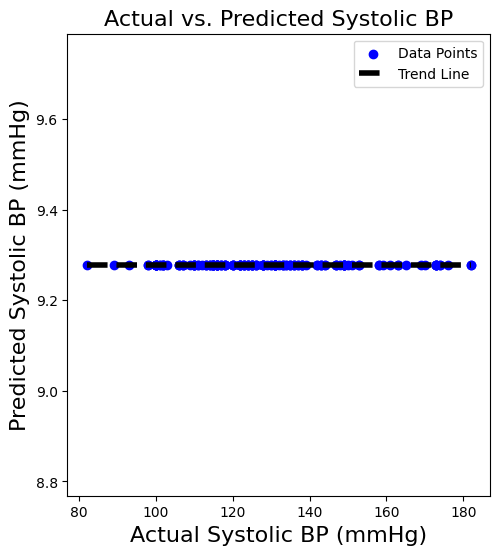

In [24]:
# Plotting actual vs. predicted Systolic Blood Pressure
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_systolic, predicted_systolic, label='Data Points', color='blue')
plt.plot([y_test_systolic.min(), y_test_systolic.max()], [predicted_systolic.min(), predicted_systolic.max()], 'k--', lw=4, label='Trend Line')
plt.xlabel('Actual Systolic BP (mmHg)', fontsize=16)
plt.ylabel('Predicted Systolic BP (mmHg)', fontsize=16)
plt.title('Actual vs. Predicted Systolic BP', fontsize=16)
plt.legend()

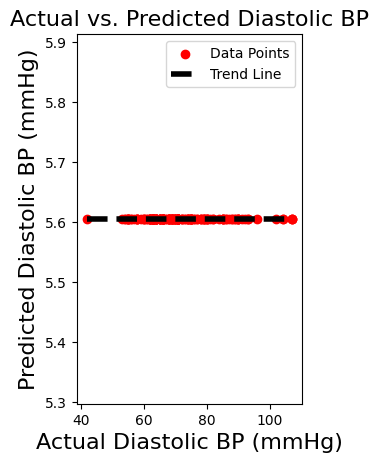

In [25]:
# Plotting actual vs. predicted Diastolic Blood Pressure
plt.subplot(1, 2, 2)
plt.scatter(y_test_diastolic, predicted_diastolic, label='Data Points', color='red')
plt.plot([y_test_diastolic.min(), y_test_diastolic.max()], [predicted_diastolic.min(), predicted_diastolic.max()], 'k--', lw=4, label='Trend Line')
plt.xlabel('Actual Diastolic BP (mmHg)', fontsize=16)
plt.ylabel('Predicted Diastolic BP (mmHg)', fontsize=16)
plt.title('Actual vs. Predicted Diastolic BP', fontsize=16)
plt.legend()

In [26]:
plt.tight_layout()
plt.savefig('PPG/SBP-DBP-prediction.png', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

In [27]:
# Bland-Altman Plot for Systolic Blood Pressure
mean_systolic = np.mean([y_test_systolic, predicted_systolic], axis=0)
diff_systolic = y_test_systolic - predicted_systolic
mean_diff_systolic = np.mean(diff_systolic)
std_diff_systolic = np.std(diff_systolic)
upper_limit_systolic = mean_diff_systolic + 1.96 * std_diff_systolic
lower_limit_systolic = mean_diff_systolic - 1.96 * std_diff_systolic

# Bland-Altman Plot for Diastolic Blood Pressure
mean_diastolic = np.mean([y_test_diastolic, predicted_diastolic], axis=0)
diff_diastolic = y_test_diastolic - predicted_diastolic
mean_diff_diastolic = np.mean(diff_diastolic)
std_diff_diastolic = np.std(diff_diastolic)
upper_limit_diastolic = mean_diff_diastolic + 1.96 * std_diff_diastolic
lower_limit_diastolic = mean_diff_diastolic - 1.96 * std_diff_diastolic

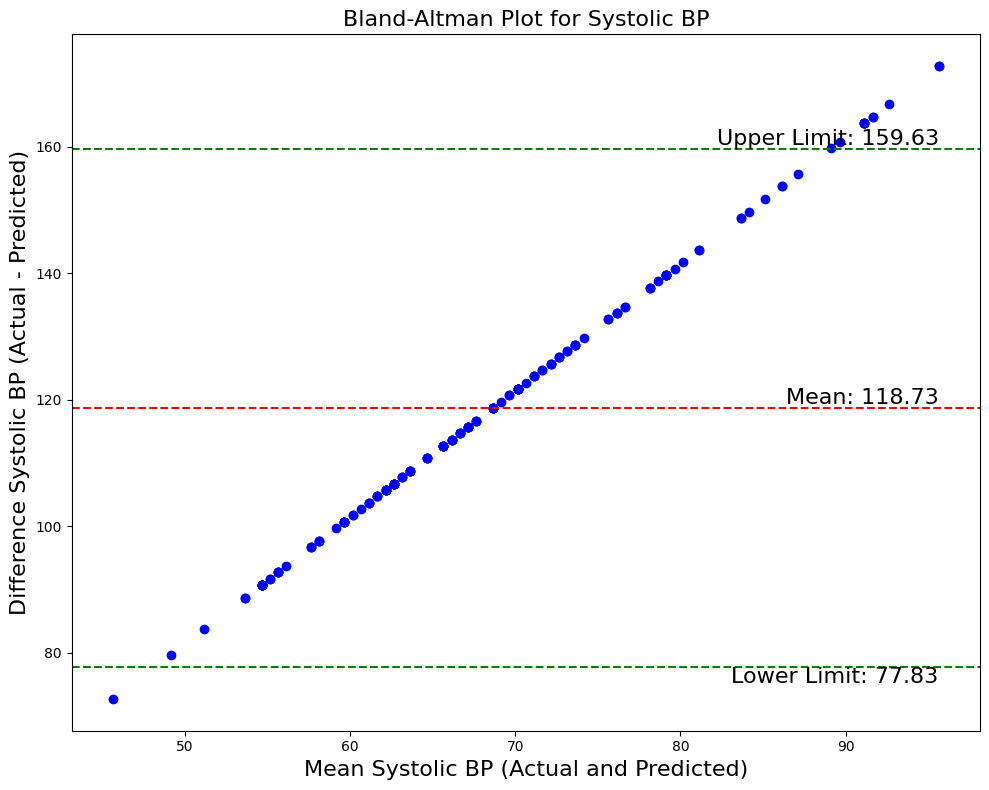

In [28]:
plt.figure(figsize=(10, 8))
# Systolic Bland-Altman Plot
# plt.subplot(1, 2, 1)
plt.scatter(mean_systolic, diff_systolic, color='blue')
plt.axhline(mean_diff_systolic, color='red', linestyle='--')
plt.axhline(mean_diff_systolic + 1.96 * std_diff_systolic, color='green', linestyle='--')
plt.axhline(mean_diff_systolic - 1.96 * std_diff_systolic, color='green', linestyle='--')
plt.text(x=max(mean_systolic), y=mean_diff_systolic, s=f'Mean: {mean_diff_systolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_systolic), y=upper_limit_systolic, s=f'Upper Limit: {upper_limit_systolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_systolic), y=lower_limit_systolic, s=f'Lower Limit: {lower_limit_systolic:.2f}', va='top', ha='right', fontsize=16)
plt.xlabel('Mean Systolic BP (Actual and Predicted)', fontsize=16)
plt.ylabel('Difference Systolic BP (Actual - Predicted)', fontsize=16)
plt.title('Bland-Altman Plot for Systolic BP', fontsize=16)
plt.tight_layout()
plt.savefig('PPG/Bland-Altman-Plot-SBP.png', dpi=300)
plt.show()

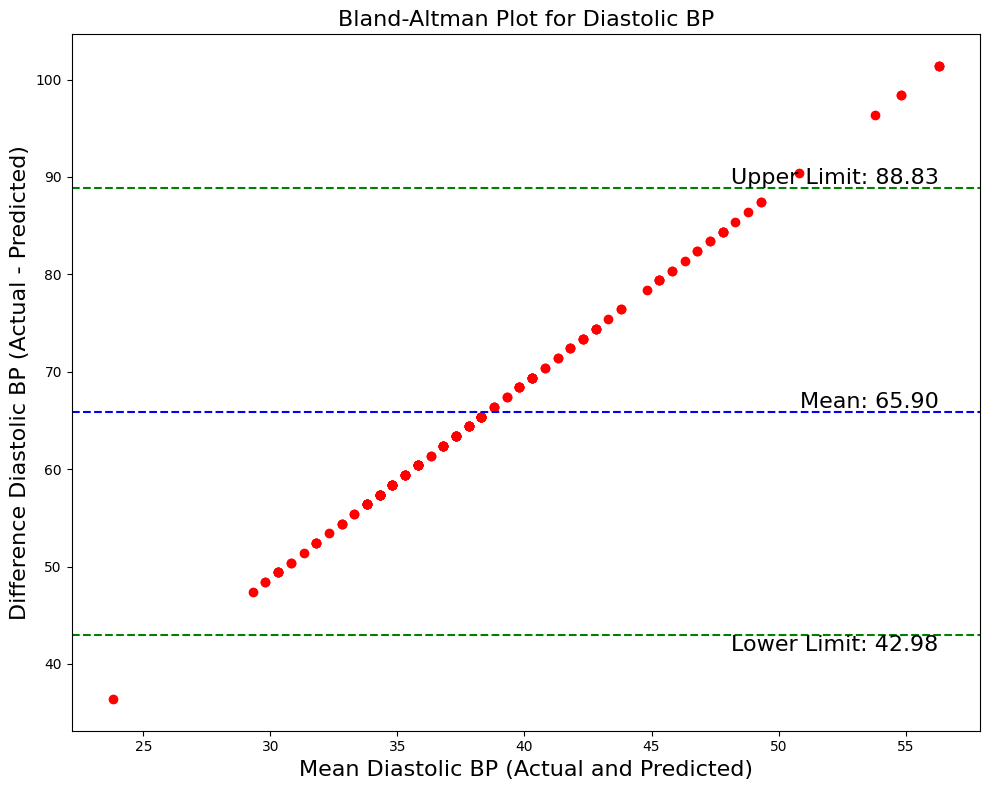

In [29]:
# Diastolic Bland-Altman Plot
plt.figure(figsize=(10, 8))
# plt.subplot(1, 2, 2)
plt.scatter(mean_diastolic, diff_diastolic, color='red')
plt.axhline(mean_diff_diastolic, color='blue', linestyle='--')
plt.axhline(mean_diff_diastolic + 1.96 * std_diff_diastolic, color='green', linestyle='--')
plt.axhline(mean_diff_diastolic - 1.96 * std_diff_diastolic, color='green', linestyle='--')
plt.text(x=max(mean_diastolic), y=mean_diff_diastolic, s=f'Mean: {mean_diff_diastolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_diastolic), y=upper_limit_diastolic, s=f'Upper Limit: {upper_limit_diastolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_diastolic), y=lower_limit_diastolic, s=f'Lower Limit: {lower_limit_diastolic:.2f}', va='top', ha='right', fontsize=16)
plt.xlabel('Mean Diastolic BP (Actual and Predicted)', fontsize=16)
plt.ylabel('Difference Diastolic BP (Actual - Predicted)', fontsize=16)
plt.title('Bland-Altman Plot for Diastolic BP', fontsize=16)

plt.tight_layout()
plt.savefig('PPG/Bland-Altman-Plot-DBP.png', dpi=300)
plt.show()

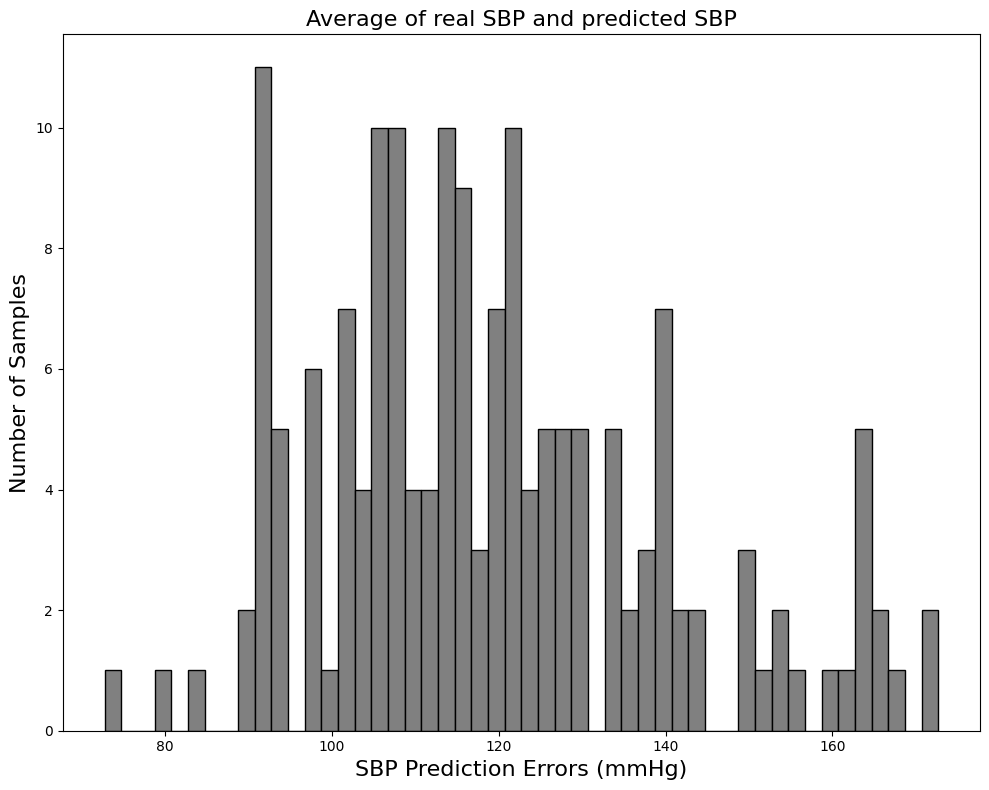

In [30]:
# Calculate prediction errors
errors_systolic = y_test_systolic - predicted_systolic
errors_diastolic = y_test_diastolic - predicted_diastolic

# Create histograms
plt.figure(figsize=(10, 8))

# Histogram for Systolic Blood Pressure Errors
# plt.subplot(1, 2, 1)
plt.hist(errors_systolic, bins=50, color='gray', edgecolor='black')
plt.xlabel('SBP Prediction Errors (mmHg)', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.title('Average of real SBP and predicted SBP', fontsize=16)
plt.tight_layout()
plt.savefig('PPG/Prediction-errors-SBP.png', dpi=300)
plt.show()

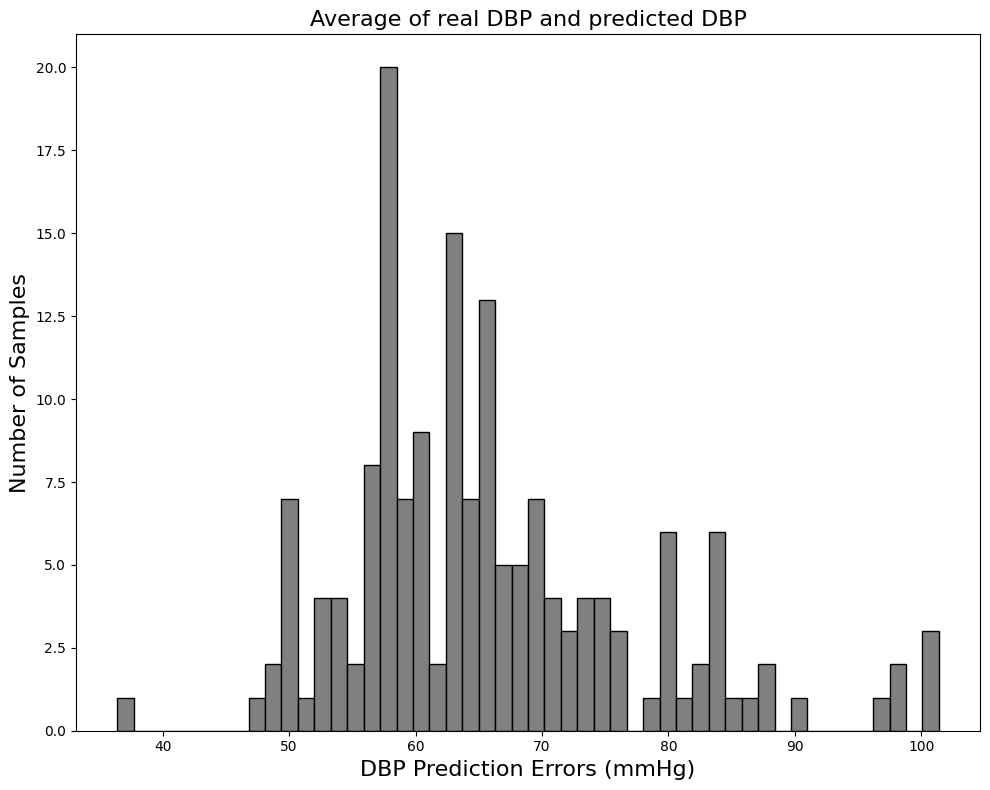

In [31]:
# Histogram for Diastolic Blood Pressure Errors
plt.figure(figsize=(10, 8))
# plt.subplot(1, 2, 2)
plt.hist(errors_diastolic, bins=50, color='gray', edgecolor='black')
plt.xlabel('DBP Prediction Errors (mmHg)', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.title('Average of real DBP and predicted DBP', fontsize=16)

plt.tight_layout()
plt.savefig('PPG/Prediction-errors-DBP.png', dpi=300)
plt.show()

In [32]:
# Calculate MAE
mae_systolic = np.mean(np.abs(errors_systolic))
mae_diastolic = np.mean(np.abs(errors_diastolic))

# Calculate MAPD
mapd_systolic = np.mean(np.abs(errors_systolic / y_test_systolic)) * 100
mapd_diastolic = np.mean(np.abs(errors_diastolic / y_test_diastolic)) * 100

# Calculate Cumulative Percentages (CP)
cp_systolic_5 = np.mean(np.abs(errors_systolic) <= 5) * 100
cp_systolic_10 = np.mean(np.abs(errors_systolic) <= 10) * 100
cp_systolic_15 = np.mean(np.abs(errors_systolic) <= 15) * 100
cp_diastolic_5 = np.mean(np.abs(errors_diastolic) <= 5) * 100
cp_diastolic_10 = np.mean(np.abs(errors_diastolic) <= 10) * 100
cp_diastolic_15 = np.mean(np.abs(errors_diastolic) <= 15) * 100

# Calculate ME
me_systolic = np.mean(errors_systolic)
me_diastolic = np.mean(errors_diastolic)

# Calculate SD
sd_systolic = np.std(errors_systolic)
sd_diastolic = np.std(errors_diastolic)

In [33]:
# Printing results
print("Systolic BP:")
print(f"MAE: {mae_systolic:.3f} mmHg")
print(f"MAPD: {mapd_systolic:.3f}%")
print(f"CP within 5 mmHg: {cp_systolic_5:.3f}%")
print(f"CP within 10 mmHg: {cp_systolic_10:.3f}%")
print(f"CP within 15 mmHg: {cp_systolic_15:.3f}%")
print(f"ME: {me_systolic:.3f} mmHg")
print(f"SD: {sd_systolic:.3f} mmHg")

print("\nDiastolic BP:")
print(f"MAE: {mae_diastolic:.3f} mmHg")
print(f"MAPD: {mapd_diastolic:.3f}%")
print(f"CP within 5 mmHg: {cp_diastolic_5:.3f}%")
print(f"CP within 10 mmHg: {cp_diastolic_10:.3f}%")
print(f"CP within 15 mmHg: {cp_diastolic_15:.3f}%")
print(f"ME: {me_diastolic:.3f} mmHg")
print(f"SD: {sd_diastolic:.3f} mmHg")

Systolic BP:
MAE: 118.727 mmHg
MAPD: 92.564%
CP within 5 mmHg: 0.000%
CP within 10 mmHg: 0.000%
CP within 15 mmHg: 0.000%
ME: 118.727 mmHg
SD: 20.867 mmHg

Diastolic BP:
MAE: 65.904 mmHg
MAPD: 91.965%
CP within 5 mmHg: 0.000%
CP within 10 mmHg: 0.000%
CP within 15 mmHg: 0.000%
ME: 65.904 mmHg
SD: 11.698 mmHg
